# GSoC Coding challenge

### [Bilingual dictionary enrichment via graph completion](http://wiki.apertium.org/wiki/Ideas_for_Google_Summer_of_Code/Bilingual_dictionary_enrichment_via_graph_completion) 
### [Proposal](http://wiki.apertium.org/wiki/User:GD/proposal)

In [3]:
import networkx as nx

In [9]:
import matplotlib.pyplot as plt

In [22]:
import warnings
warnings.filterwarnings("ignore")

Let's take 4 strongly connected languages: Spanish, Catalan, French, English. I know French and English as foreign languages and Catalan an Spanish have their own pair so it will be easy to check results.

1. Spanish - Catalan
https://raw.githubusercontent.com/apertium/apertium-spa-cat/e871fb935e5f2d70572b8253431dde148f81f935/apertium-spa-cat.spa-cat.dix
2. French - Catalan
https://raw.githubusercontent.com/apertium/apertium-fra-cat/e388359e3c5e0753507098b1195079350523cae8/apertium-fra-cat.fra-cat.dix
3. English - Catalan
https://raw.githubusercontent.com/apertium/apertium-eng-cat/1d7c0dc28a57d5b57c5eb650f4e5b752b2140345/apertium-eng-cat.eng-cat.dix
4. English - Spanish
https://raw.githubusercontent.com/apertium/apertium-en-es/d0a72e428a23081aaf479d00f30d63053a149cce/apertium-en-es.en-es.dix
5. French - Spanish
https://raw.githubusercontent.com/apertium/apertium-fr-es/7901047303da621a1695b4a0df9a30e3c8418404/apertium-fr-es.fr-es.dix

In [24]:
LANG = nx.Graph()

In [26]:
elist = [('ES', 'CA'), ('FR', 'CA'), ('EN', 'CA'), ('FR', 'ES'), ('EN','ES')]

In [27]:
LANG.add_edges_from(elist)

In [28]:
LANG.nodes()

['ES', 'CA', 'FR', 'EN']

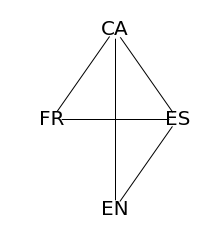

In [33]:
plt.subplot(121)
nx.draw_shell(LANG, with_labels = True, font_size = 20, node_color = 'white')
plt.show()

In [36]:
import xml.etree.ElementTree as ET
import requests

In [39]:
response = requests.get('https://raw.githubusercontent.com/apertium/apertium-spa-cat/e871fb935e5f2d70572b8253431dde148f81f935/apertium-spa-cat.spa-cat.dix')
tree = ET.fromstring(response.content)

In [55]:
all_elements = tree.find('section').findall('e')

In [67]:
a = 0

In [68]:
for i in tree.find('section').findall('e'):
    try:
        i.find('p').find('l').text
        a += 1
    except:
        pass
print (a)

36420


In [82]:
G = nx.Graph()

In [83]:
G.add_nodes_from([1], lemma='LEMMA', language = 'EN', pos = 'N')

In [93]:
labels=dict((n,[d['lemma'],d['language']]) for n,d in G.nodes(data=True))

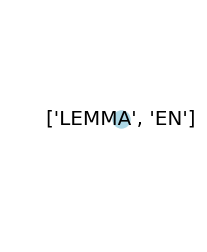

In [94]:
plt.subplot(121)
nx.draw_shell(G, with_labels = True, font_size = 20, node_color = 'lightblue',labels = labels)
plt.show()